In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from maskcnn import training_aux_wrapper
from tang_jcompneuro.model_fitting_postprocess import load_model_performance

In [3]:
from tang_jcompneuro.cell_classification import get_ready_to_use_classification
cell_class_dict = get_ready_to_use_classification()

In [4]:
# load b.9 performance as baseline
# let's work on OT neurons first.
neuron_subset = 'HO'
baseline_perf = load_model_performance('MkA_Shape', 'all',
                                       100, 0, 'cnn', 'b.9')['corr'][cell_class_dict['MkA_Shape'][neuron_subset]]
print(baseline_perf.shape, (baseline_perf**2).mean())

(338,) 0.219384397298


In [5]:
arch_config = '9_3_100'
training_aux_wrapper.gen_all_arch_config('MkA_Shape', 'all', neuron_subset)[arch_config]

{'act_fn': 'softplus',
 'conv': [{'bn': True,
   'bn_affine': True,
   'dilation': 1,
   'kernel_size': 9,
   'out_channel': 106,
   'padding': 0,
   'pool': None,
   'stride': 1},
  {'bn': True,
   'bn_affine': True,
   'dilation': 1,
   'kernel_size': 3,
   'out_channel': 106,
   'padding': 1,
   'pool': None,
   'stride': 1},
  {'bn': True,
   'bn_affine': True,
   'dilation': 1,
   'kernel_size': 3,
   'out_channel': 106,
   'padding': 1,
   'pool': None,
   'stride': 1}],
 'conv_last_no_act': True,
 'fc': {'dropout': None,
  'factored': True,
  'factored_constraint': 'abs',
  'mlp': None},
 'linear_output': False}

In [6]:
opt_config = 'mse_100'
training_aux_wrapper.all_opt_configs[opt_config]

{'conv': [{'group': 0.0, 'smoothness': 0.0},
  {'group': 0.0, 'smoothness': 0.0},
  {'group': 0.0, 'smoothness': 0.0}],
 'fc': {'scale': 0.0001},
 'legacy': True,
 'loss': 'mse',
 'optimizer': {'bn_scale_nolearning': False,
  'lr': 0.001,
  'optimizer_type': 'adam'}}

In [7]:
print('single', 883*cell_class_dict['MkA_Shape'][neuron_subset].sum())

single 298454


In [8]:
train_results = training_aux_wrapper.train_one_wrapper('MkA_Shape', 'all', neuron_subset, 0, arch_config, opt_config, save=False)

(6080, 1, 20, 20)
(6080, 1142)
(1900, 1, 20, 20)
(1900, 1142)
(1520, 1, 20, 20)
(1520, 1142)
num_param 296308
========starting phase 1/3==========
========starting epoch 500==========
val metric
 {'loss': 0.014330951, 'corr': None, 'corr2_mean': 0.10760848}
test metric
 {'loss': 0.0141576, 'corr': None, 'corr2_mean': 0.10979404}
========done epoch 500==========
========starting epoch 1000==========
val metric
 {'loss': 0.014296006, 'corr': None, 'corr2_mean': 0.14212026}
test metric
 {'loss': 0.014122534, 'corr': None, 'corr2_mean': 0.14427501}
========done epoch 1000==========
========starting epoch 1500==========
val metric
 {'loss': 0.013485111, 'corr': None, 'corr2_mean': 0.16377486}
test metric
 {'loss': 0.013373004, 'corr': None, 'corr2_mean': 0.16583255}
========done epoch 1500==========
========starting epoch 2000==========
val metric
 {'loss': 0.0130432, 'corr': None, 'corr2_mean': 0.17983258}
test metric
 {'loss': 0.012929517, 'corr': None, 'corr2_mean': 0.18254565}
========d

In [9]:
# show corr between b.9 performance and this one.

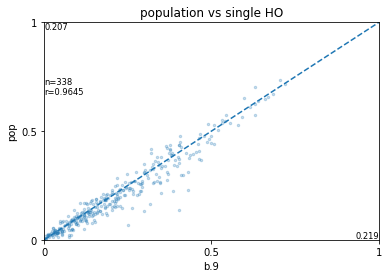

In [10]:
from tang_jcompneuro.plotting import show_one_basic
plt.close('all')
show_one_basic((baseline_perf**2), train_results[2]**2,
              xlabel='b.9', ylabel='pop', title=f'population vs single {neuron_subset}')
plt.show()

In [11]:
training_aux_wrapper.train_one_wrapper('MkA_Shape', 'all', neuron_subset, 0, arch_config, opt_config)
training_aux_wrapper.train_one_wrapper('MkA_Shape', 'all', neuron_subset, 1, arch_config, opt_config)

MkA_Shape/all/HO/0/cnn_population/9_3_100+mse_100/HO start
(6080, 1, 20, 20)
(6080, 1142)
(1900, 1, 20, 20)
(1900, 1142)
(1520, 1, 20, 20)
(1520, 1142)
num_param 296308
========starting phase 1/3==========
========starting epoch 500==========
val metric
 {'loss': 0.014266292, 'corr': None, 'corr2_mean': 0.1077299}
test metric
 {'loss': 0.014091041, 'corr': None, 'corr2_mean': 0.10998072}
========done epoch 500==========
========starting epoch 1000==========
val metric
 {'loss': 0.014106071, 'corr': None, 'corr2_mean': 0.14301506}
test metric
 {'loss': 0.013933333, 'corr': None, 'corr2_mean': 0.14523061}
========done epoch 1000==========
========starting epoch 1500==========
val metric
 {'loss': 0.013355805, 'corr': None, 'corr2_mean': 0.16382939}
test metric
 {'loss': 0.0132527, 'corr': None, 'corr2_mean': 0.1657269}
========done epoch 1500==========
========starting epoch 2000==========
val metric
 {'loss': 0.013054514, 'corr': None, 'corr2_mean': 0.18021108}
test metric
 {'loss': 0.0

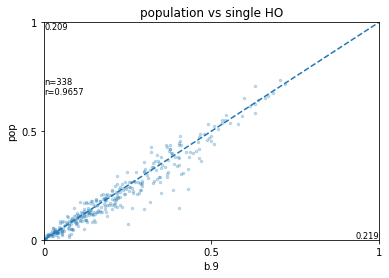

In [12]:
from maskcnn import postprocess
plt.close('all')
show_one_basic((baseline_perf**2),
               postprocess.load_model_performance('MkA_Shape', 'all', neuron_subset, 0, arch_config, opt_config)['corr']**2,
              xlabel='b.9', ylabel='pop', title=f'population vs single {neuron_subset}')
plt.show()

In [13]:
baseline_perf_2 = load_model_performance('MkA_Shape', 'all',
                                       100, 1, 'cnn', 'b.9')['corr'][cell_class_dict['MkA_Shape'][neuron_subset]]

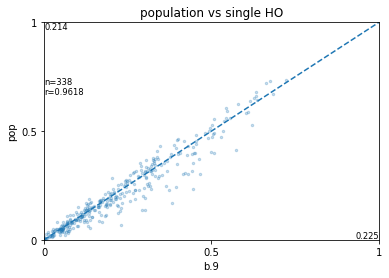

In [14]:
plt.close('all')
show_one_basic((baseline_perf_2**2),
               postprocess.load_model_performance('MkA_Shape', 'all', neuron_subset, 1, arch_config, opt_config)['corr']**2,
              xlabel='b.9', ylabel='pop', title=f'population vs single {neuron_subset}')
plt.show()